### 1. Make a function that can take any non-negative integer as an argument and return it with its digits in descending order. Essentially, rearrange the digits to create the highest possible number. If no number is passed in, make the default value inputted = 111111.
Input = 43905 Output = 95430

Input = 584366 Output = 866543

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function definition is here, default values defined along with function.
def highestnumber(n=111111):
    "This prints digits of any input non-negative integer in descending order"
    if n >= 0:
        return int("".join(sorted(str(n), reverse = True)))
    else: 
        return "invalid input"
            
# Now you can call function
print(highestnumber(8675309), highestnumber(-222567), highestnumber())

9876530 invalid input 111111


### 2. Import jeopardy.csv and create a dataframe from the data. Find out the following:
a. How many rows are there in the dataframe? What does a row represent?

b. How many unique shows were there each year?

c. Think of another question that this data can help answer. Make that question a header in your notebook.

d. Answer your question and show the steps you used to do so clearly.

In [5]:
#import csv

JEOPARDY_CSV_path = "C:/Users/Nik/Documents/LaunchCoderGirlSTL/JEOPARDY_CSV.csv"
JEOPARDY_df = pd.read_csv(JEOPARDY_CSV_path)

2.a) How many rows are there in the dataframe? What does a row represent?

In [6]:
print(len(JEOPARDY_df))

#There are 216930 rows in the data frame. The rows represents correct answers from the game show Jeapordy! 
# with their corresponding question, the dollar value of giving the correct answer, category of question, 
# type of game round, air date, and episode number.

216930


2.b) How many unique shows were there each year?

In [7]:
JEOPARDY_df.groupby(' Air Date')['Show Number'].agg(pd.Series.drop_duplicates)
#JEOPARDY_df.drop_duplicates(subset=[' Air Date', 'Show Number'])
#print(len(jeopardy_df))
JEOPARDY_df[' Air Date'] = pd.to_datetime(JEOPARDY_df[' Air Date'])
#JEOPARDY_df['Year'] = JEOPARDY_df[' Air Date'].dt.year
Unique_Shows_per_Year = pd.DataFrame(JEOPARDY_df.groupby(JEOPARDY_df[' Air Date'].dt.year)['Show Number'].nunique())
Unique_Shows_per_Year.columns = ['Number of Shows']
Unique_Shows_per_Year.T

Air Date,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Number of Shows,23,16,25,22,22,36,73,24,32,35,...,158,220,225,230,231,232,226,231,224,19


2.c)Think of another question that this data can help answer. Make that question a header in your notebook.

## On average, how many answers were given per Jeopardy! show?

In [9]:
# I can answer my question by taking the total number of answers and dividing that by the number of unique shows. 
# To do this, I called the number of elements in JEOPARDY_df[' Answer'] divided by
# unique values in JEOPARDY_df['Show Number']

Avg_Number_of_Answers_per_Show = JEOPARDY_df[' Answer'].count() / JEOPARDY_df['Show Number'].nunique()
Avg_Number_of_Answers_per_Show

59.5956043956044

3. Create any graph using matplotlib that helps you understand the jeopardy data. Explain what your graph shows and why it is useful.

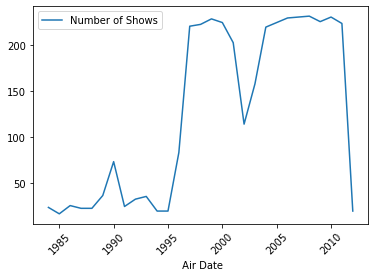

In [10]:
Unique_Shows_per_Year.plot(kind='line')
plt.xticks(rotation = 45)
plt.show()

This plot illustrates the number of shows per year, giving one an idea of when the show was most popular. Using a line graph visualizes the data as a trend line that makes it easier to understand from a glance.